In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
import aiohttp

async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                with open(filename, "wb") as f:
                    f.write(await response.read())

url = "https://example.com/data.csv"
filename = "data.csv"

await download(url, filename)

In [3]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

await download(file_path, "usedcars.csv")
file_name="usedcars.csv"

In [4]:
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm

In [10]:
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
lm.fit(X,Y)

In [14]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [16]:
lm.intercept_


38423.3058581574

In [17]:
lm.coef_

array([-821.73337832])

In [ ]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

In [21]:
lm1.coef_



array([[166.86001569]])

In [22]:
# Intercept
lm1.intercept_

array([-7963.33890628])

In [24]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

In [61]:
# Multiple Linear Regression
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [42]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses']]

In [43]:
#Consequently this would be the dependent variable
lm.fit(Z, df['price'])

LinearRegression()

In [44]:
lm.intercept_


-15806.62462632923

In [45]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [46]:

# Obtener el nombre de las características seleccionadas en Z
nombres_caracteristicas = Z.columns

# Obtener los coeficientes (pendientes) para cada característica
coeficientes_por_caracteristica = dict(zip(nombres_caracteristicas, lm.coef_))

# Mostrar los coeficientes por característica
for caracteristica, coeficiente in coeficientes_por_caracteristica.items():
    print(f"Coeficiente para {caracteristica}: {coeficiente}")

# Mostrar la intercepción
print("Intercepción:", lm.intercept_)


Coeficiente para horsepower: 53.49574422604914
Coeficiente para curb-weight: 4.707700994613942
Coeficiente para engine-size: 81.53026382122762
Coeficiente para highway-mpg: 36.05748881648592
Intercepción: -15806.62462632923


In [51]:
LM2 = LinearRegression()
LM2 = df[['normalized-losses', 'highway-mpg']]

In [52]:
lm.fit(LM2, df['price'])

LinearRegression()

In [53]:
lm.intercept_

38201.31327245727

In [54]:
lm.coef_

array([   1.49789586, -820.45434016])

In [55]:
#Model Evaluation Using Visualization
# It is recommended regression plots as acatter 

import seaborn as sns
%matplotlib inline

(0.0, 48172.23939440565)

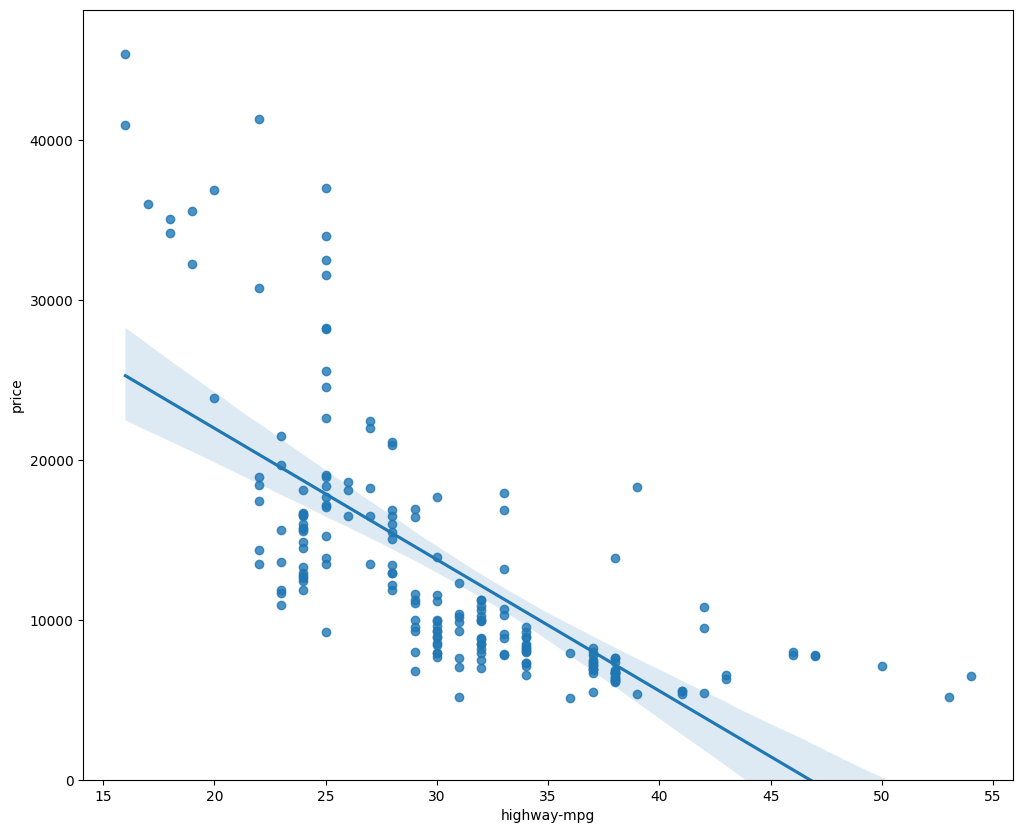

In [56]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

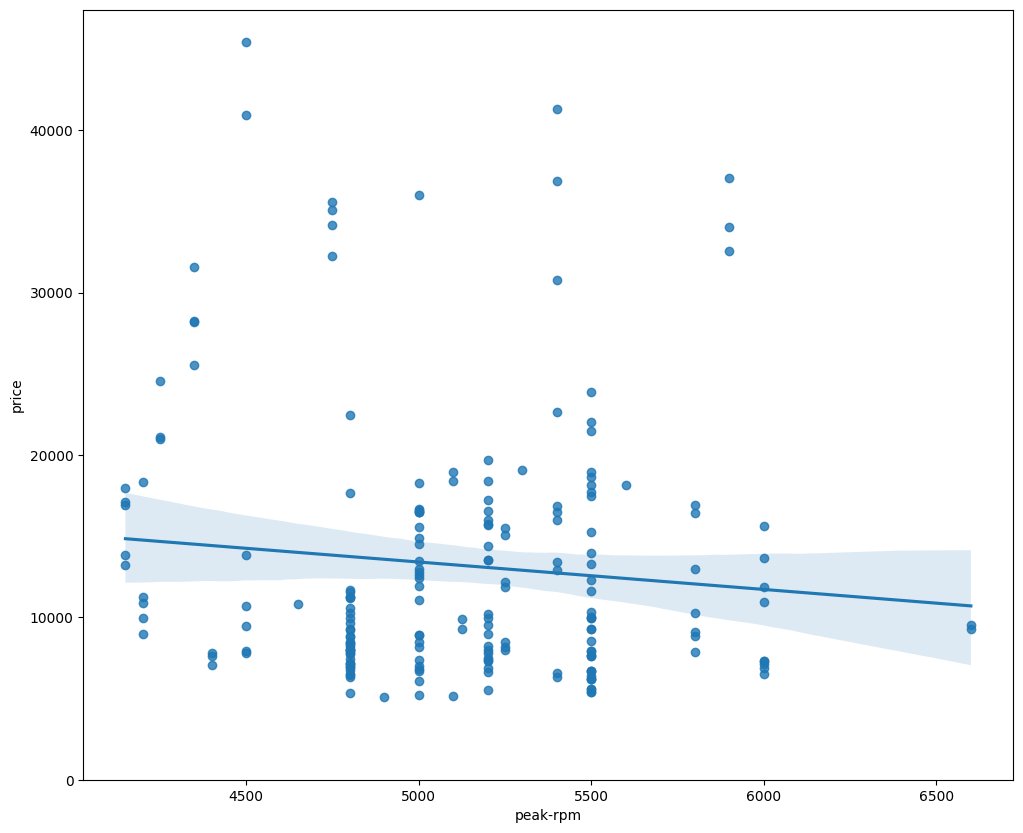

In [57]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [58]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [ ]:
# # The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616

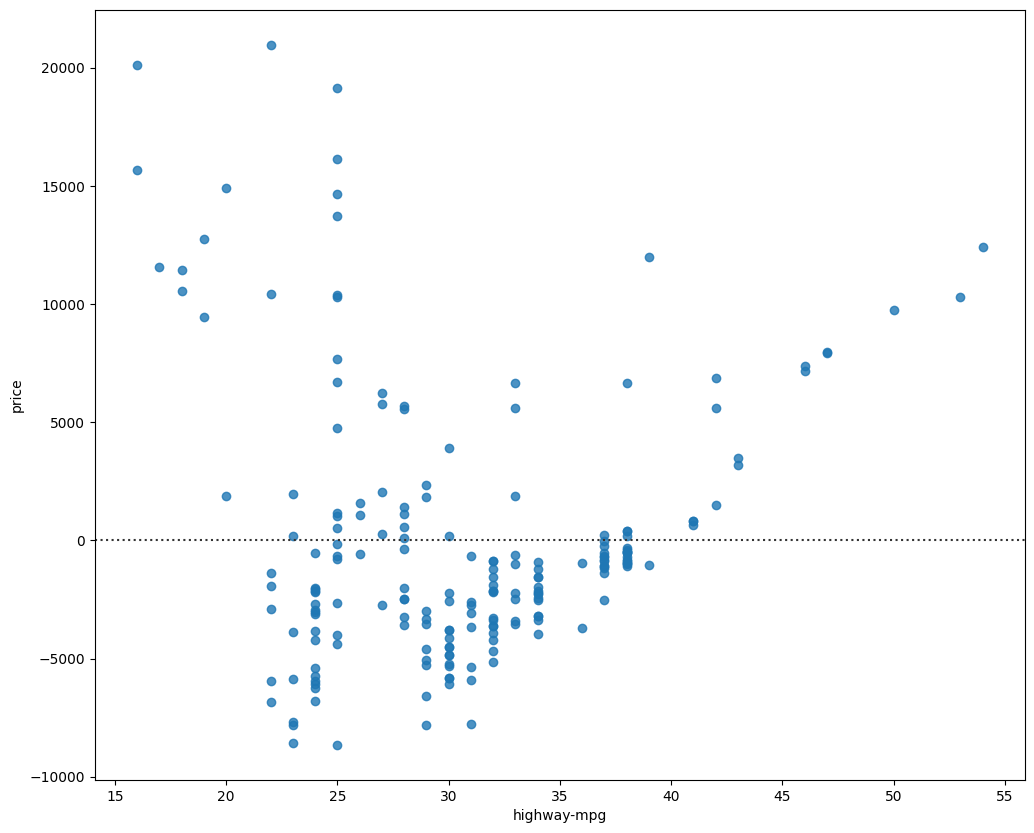

In [59]:
## Residual Plot 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [ ]:
# The residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

In [63]:
#Multiple Linear Regression 

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses']]
lm.fit(Z, df['price'])

LinearRegression()

In [64]:
Y_hat = lm.predict(Z)

C:\Users\HP\AppData\Local\Temp\ipykernel_13572\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\HP\AppData\Local\Temp\ipykernel_13572\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

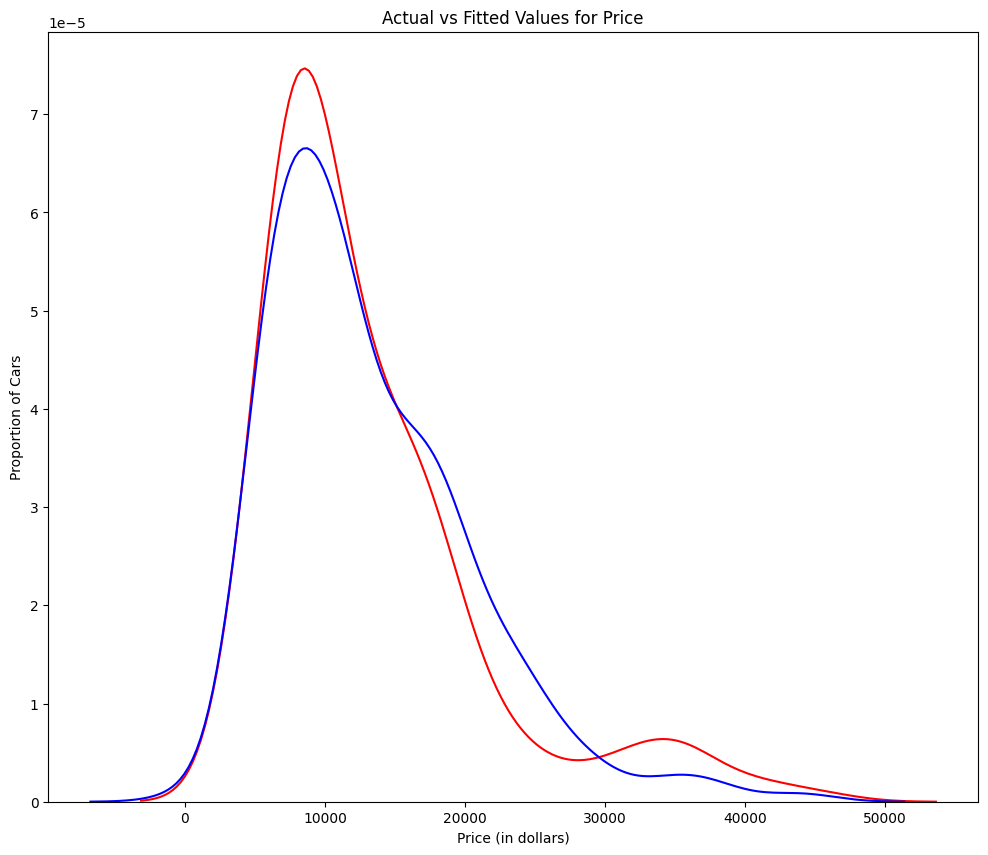

In [65]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<Figure size 1200x1000 with 0 Axes>

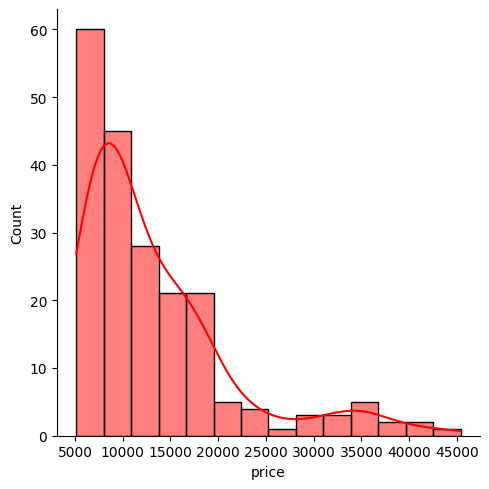

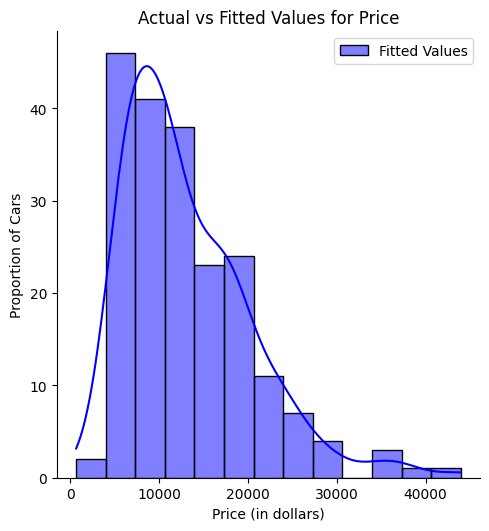

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(width, height))

# Utilizando displot para trazar la distribución de los valores reales
sns.displot(df['price'], color="r", label="Actual Value", kde=True)

# Utilizando displot para trazar la distribución de los valores ajustados
sns.displot(Y_hat, color="b", label="Fitted Values", kde=True)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()
plt.show()
plt.close()


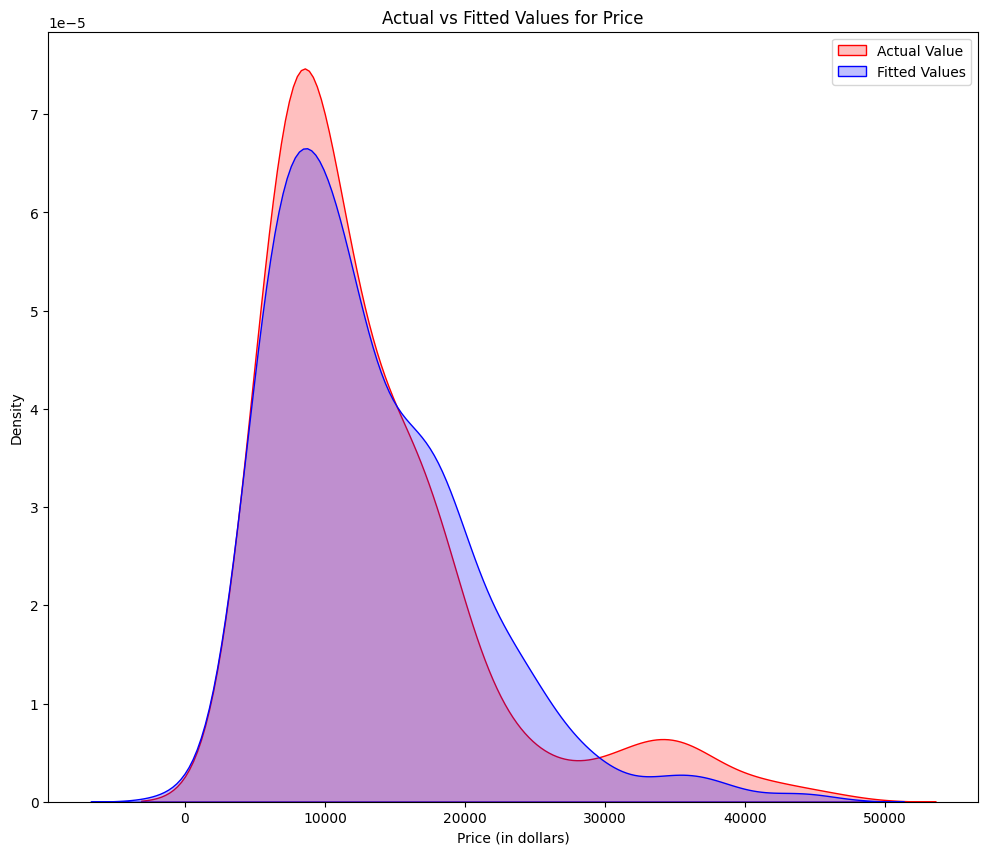

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(width, height))

# Tracing the distribution of actual values using kdeplot
sns.kdeplot(df['price'], color="r", label="Actual Value", fill=True)

# Tracing the distribution of fitted values using kdeplot
sns.kdeplot(Y_hat, color="b", label="Fitted Values", fill=True)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Density')

plt.legend()
plt.show()
plt.close()


In [ ]:
#Polynomial Regression and and Pipelines

In [73]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    

In [74]:
x = df['highway-mpg']
y = df['price']

In [75]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


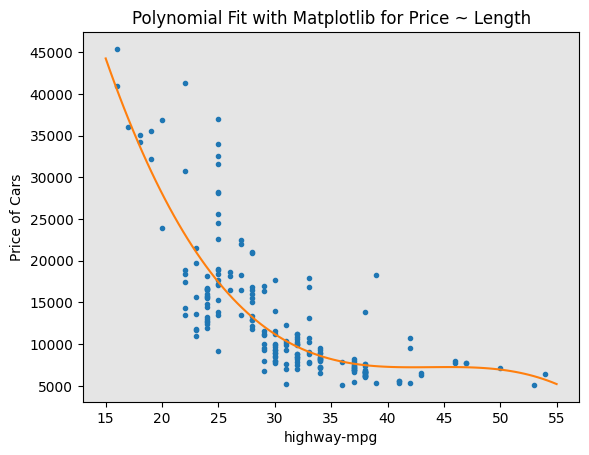

In [76]:
PlotPolly(p, x, y, 'highway-mpg')

In [77]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


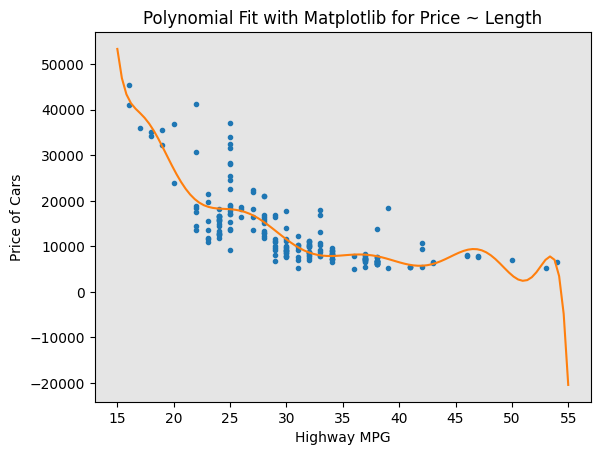

In [78]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [81]:
Z_pr=pr.fit_transform(Z)

In [82]:
Z.shape

(201, 5)

In [83]:
Z_pr.shape

(201, 21)

In [84]:
# Pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [85]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [86]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [87]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [88]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13017.2847683 , 13017.2847683 , 18402.80590011, 10828.8592004 ])

In [89]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13692.74717232, 13692.74717232, 19030.10662502, 10688.26864816,
       15587.64238133, 13862.61478746, 15517.14091329, 15973.36770901,
       17656.82739036, 10839.78110737])

In [90]:
# Model Evaluation 
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [91]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [92]:
##Second MEAN Square

from sklearn.metrics import mean_squared_error

In [93]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [94]:
#Polynomial Fit 
from sklearn.metrics import r2_score

In [96]:
r_squared = r2_score(y, p(x))
print('The R-square value is:', r_squared)

The R-square value is: 0.674194666390652


In [97]:
mean_squared_error(df['price'], p(x))

20474146.426361218